In [1]:
import pandas as pd#import necessary packages for analysis
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn as sk
import scipy as sp

In [3]:
from sklearn import linear_model
import statsmodels.api as sm
import time
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures




In [4]:
allStates=pd.read_csv('allStatesR.csv')
type(allStates)#read in states dataset
df=allStates


In [5]:
%matplotlib inline

In [6]:
dfMask=df[df['bin']=='mask']
dfCovid=df[df['bin']=='covid']
dfTravel=df[df['bin']=='travel']
#create bins for later, based on each hashtag



In [7]:
dfCovid = dfCovid.sample(n=100, random_state=1)#take samples from each for a graphic
dfMask = dfMask.sample(n=100, random_state=1)
dfTravel = dfTravel.sample(n=100, random_state=1)

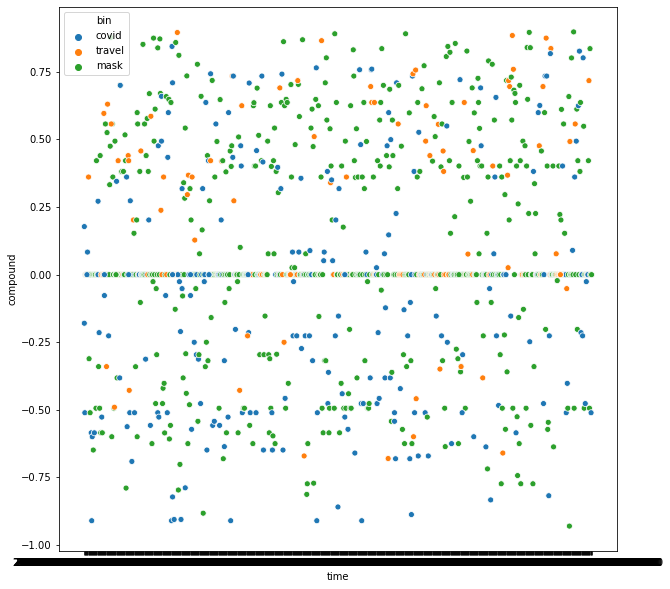

In [8]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,10
df = df.sample(n=1000, random_state=1)
sns.scatterplot(data=df, x='time', y='compound', hue='bin')#sample the hashtags and graph them using seaborn

In [9]:
df2 = pd.read_csv('US_COVID_FINAL.csv') #read in our COVID dataset

datetime = []  #merge covid dataset and twitter dataset using a join below
for value in df['time']:
    datetime.append(value.split(' ')[0])
df['time'] = datetime
df
data = df.merge(df2,  how='inner', left_on='location', right_on='state')

In [10]:
import datetime as dt
data['time'] = pd.to_datetime(data['time'])#make sure that the data is in datatime format for analysis
data['time']=data['time'].map(dt.datetime.toordinal)

In [11]:

#set intital regression model, with time and new case count predicting compound twitter sentiment
X = data[['time','new_case']] # compound~time+new_case
Y = data['compound']
 
# with sklearn
regr = linear_model.LinearRegression()#main call for using linear and multilinear regression
regr.fit(X, Y)#import in our dependent and independent variables

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -8402.00634020658
Coefficients: 
 [ 1.13888485e-02 -8.85595420e-07]
                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     482.8
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          4.46e-210
Time:                        09:42:07   Log-Likelihood:            -1.6245e+05
No. Observations:              303000   AIC:                         3.249e+05
Df Residuals:                  302997   BIC:                         3.249e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [12]:
#set intital regression model, with time being the independent variable and compound sentiment being the dependent variable
X = data[['time']] # compound~time
Y = data['compound']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)



Intercept: 
 -8408.251607969973
Coefficients: 
 [0.01139731]
                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     957.7
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          6.04e-210
Time:                        09:42:07   Log-Likelihood:            -1.6245e+05
No. Observations:              303000   AIC:                         3.249e+05
Df Residuals:                  302998   BIC:                         3.249e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [13]:
#set intital regression model, with time and compound sentiment being the independent variable and compound sentiment being the dependent variable
X = data[['time','compound']] # new_cases~time+compound
Y = data['new_case']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 6803742.099321884
Coefficients: 
 [ -9.22021894 -29.53207015]
                            OLS Regression Results                            
Dep. Variable:               new_case   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.06
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           7.85e-07
Time:                        09:42:07   Log-Likelihood:            -2.7868e+06
No. Observations:              303000   AIC:                         5.574e+06
Df Residuals:                  302997   BIC:                         5.574e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------